In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math


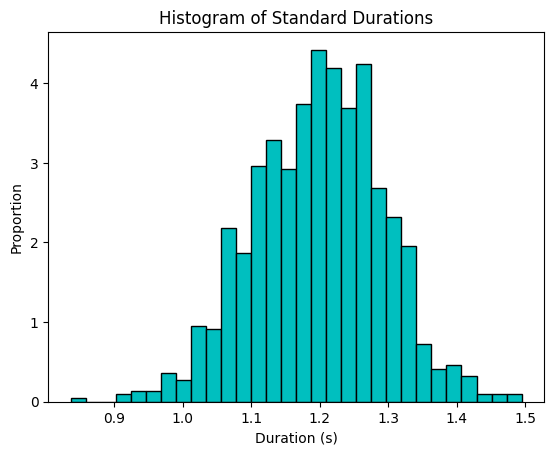

In [2]:
# generate random  normal distribution of mean 1.2 and standard deviation 0.2
data = np.random.normal(1.2, 0.1, 1000)
plt.hist(data, bins=30, color='c', edgecolor='black', density=True)
plt.title('Histogram of Standard Durations')
plt.xlabel('Duration (s)')
plt.ylabel('Proportion')
plt.show()

# relative duration of test sounds as [-200,-100,-50, 0, 50, 100, 200] ms
relative_duration = [-200, -100, -50, 0, 50, 100, 200]

Condition Matrix (rows=standard durations, cols=relative durations):


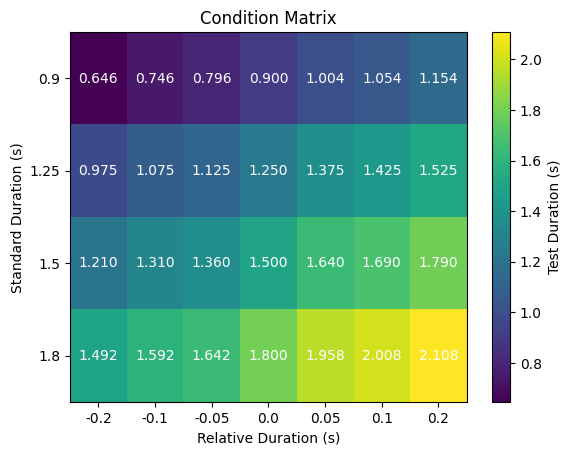

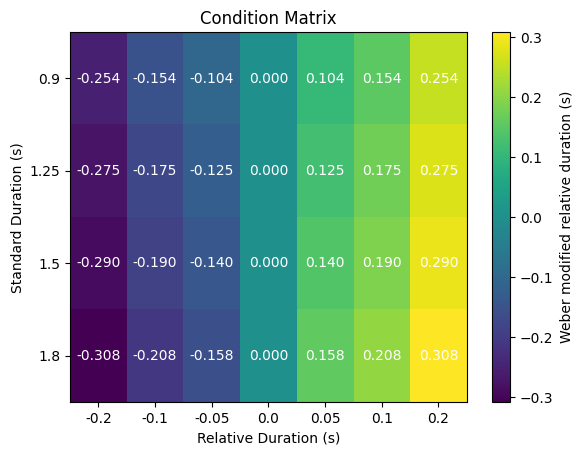

In [41]:
import numpy as np

# Define parameters
weber_fraction = 0.06
standard_durations = np.array([ 0.9, 1.25, 1.5, 1.8])  # seconds
relative_durations = np.array([-200, -100, -50, 0, 50, 100, 200]) / 1000  # Convert to seconds

# Compute test durations
condition_matrix = []
real_relative_matrix = []
for standard in standard_durations:
    test_durations = np.sign(relative_durations)*standard * weber_fraction + relative_durations + standard
    condition_matrix.append(test_durations)
    real_relative_durations = (test_durations - standard)  # Real relative duration after Weber adjustment
    real_relative_matrix.append(real_relative_durations)


# Convert to numpy arrays for easy visualization
condition_matrix = np.array(condition_matrix)
real_relative_matrix = np.array(real_relative_matrix)


# Print results
print("Condition Matrix (rows=standard durations, cols=relative durations):")

# Write each test value in the boxes
for i, standard in enumerate(standard_durations):
    for j, relative in enumerate(relative_durations):
        plt.text(j, i, f'{condition_matrix[i, j]:.3f}', ha='center', va='center', color='white')

# Plot condition matrix
plt.imshow(condition_matrix, cmap='viridis', aspect='auto')
plt.colorbar(label='Test Duration (s)')
plt.xlabel('Relative Duration (s)')
plt.ylabel('Standard Duration (s)')
plt.title('Condition Matrix')
plt.xticks(range(len(relative_durations)), relative_durations)
plt.yticks(range(len(standard_durations)), standard_durations)
plt.show()

# Plot condition matrix Standard durations vs. real relative durations(modified by weber fraction)

real_relative_durations = np.array(real_relative_matrix)
real_relative_durations = np.round(real_relative_durations, 3)

plt.imshow(real_relative_durations, cmap='viridis', aspect='auto')
plt.colorbar(label='Weber modified relative duration (s)')
plt.xlabel('Relative Duration (s)')
plt.ylabel('Standard Duration (s)')
plt.title('Condition Matrix')
plt.xticks(range(len(relative_durations)), relative_durations)
plt.yticks(range(len(standard_durations)), standard_durations)
# Write each test value in the boxes
for i, standard in enumerate(standard_durations):
    for j, relative in enumerate(relative_durations):
        plt.text(j, i, f'{real_relative_durations[i, j]:.3f}', ha='center', va='center', color='white')
plt.show()


#  create durations_matrix of standard and test durations
durations_matrix = np.zeros((len(standard_durations) * len(relative_durations), 4))
for i, standard in enumerate(standard_durations):
    for j, relative in enumerate(relative_durations):
        durations_matrix[i * len(relative_durations) + j, 0] = standard # standard duration
        durations_matrix[i * len(relative_durations) + j, 1] = relative # relative duration
        durations_matrix[i * len(relative_durations) + j, 2] = real_relative_durations[i, j] # given relative duration
        durations_matrix[i * len(relative_durations) + j, 3] = condition_matrix[i, j] # test duration

# duration matrix including standard duration, relative duration, real relative duration and test duration

# repeat the matrix 5 times to get 5 trial per condition
durations_matrix = np.tile(durations_matrix, (5, 1))
np.random.shuffle(durations_matrix)




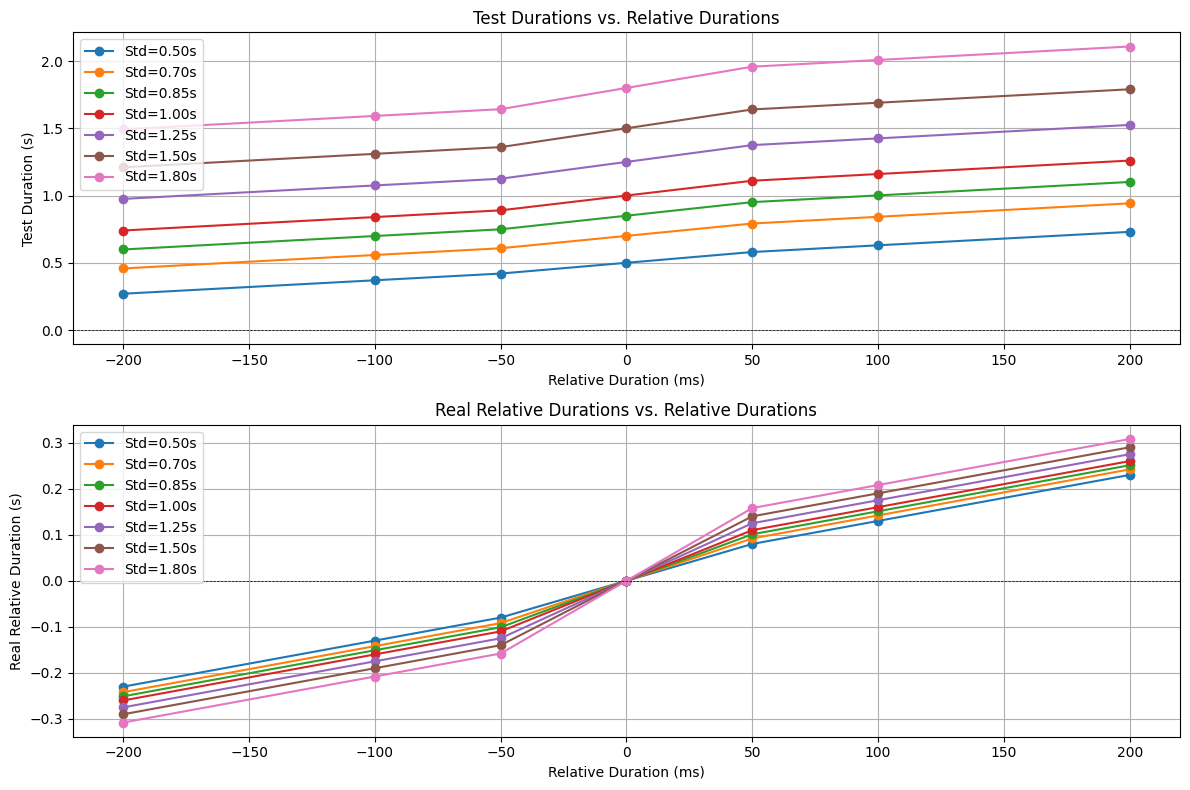

In [4]:

# Plot condition matrix
plt.figure(figsize=(12, 8))

# Standard durations vs. relative durations
plt.subplot(2, 1, 1)
for i, standard in enumerate(standard_durations):
    plt.plot(relative_durations * 1000, condition_matrix[i], marker='o', label=f"Std={standard:.2f}s")
plt.title("Test Durations vs. Relative Durations")
plt.xlabel("Relative Duration (ms)")
plt.ylabel("Test Duration (s)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

# Standard durations vs. real relative durations
plt.subplot(2, 1, 2)
for i, standard in enumerate(standard_durations):
    plt.plot(relative_durations * 1000, real_relative_matrix[i], marker='o', label=f"Std={standard:.2f}s")
plt.title("Real Relative Durations vs. Relative Durations")
plt.xlabel("Relative Duration (ms)")
plt.ylabel("Real Relative Duration (s)")
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()
